In [1]:
import numpy as np 
import pandas as pd 
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
def count_unique_values(df, column_name):
    unique_values = df[column_name].nunique()
    return unique_values

In this notebook we will be tackling the spaceship titanic problem.
I will be using different classification models on the data and then comparing them in order to come up with the most fit model for this dataset. First I'll start by analyzing the data and seeing if transformations are needed


In [2]:
df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
print (df.head())
df.isna().sum()


  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Since we have NAN values i believe we should handle them . now there are a number of ways we could go around this, we could delete the NAN values altogether and remove them from the dataframe or we could replace them with the means of features when it's fit. since the objective of this competition is to maximize the accuarcy of the model i will be dividing the data into different datasets depending on the method applied.
# Cabin column
I will transform the cabin column into two columns , one that has the cabin and its number and one that has the side of the cabin. first i will remove every instance of '/' to make the job easier and then i will split this column into three columns.
First column : Deck , i found 8 unique strings in this column so i will transform it using the label encoder function into numerical values
second column : Decknumber already numerical so we will leave it as is
third column : this one has two unique values so we will make it binary

In [3]:
df['Cabin'] = df['Cabin'].str.replace('/', '')
# extract deck and side information from the "Cabin" column
df['Deck'] = df['Cabin'].str[0] # extract the first character of the "Cabin" column as the deck
df['DeckNumber'] = df['Cabin'].str[1] # extract the remaining characters of the "Cabin" column as the deck number
df['Side'] = df['Cabin'].str[-1] # extract the last character of the "Cabin" column as the side
# drop the original "Cabin" column
df.drop('Cabin', axis=1, inplace=True)
# Fit and transform the 'Deck' column
le = LabelEncoder()
df['Deck_Numerical'] = le.fit_transform(df['Deck'].astype(str))
df.drop('Deck', axis=1, inplace=True)
#Side becomes binary#
df['Side_Numerical'] = le.fit_transform(df['Side'].astype(str))
#Display the modified dataset
df.drop ('Side',axis=1, inplace=True)
# Rename the 'Deck_Numerical' to 'Deck' and 'Side_Numerical' to 'Side'
df.columns = ['Deck' if x=='Deck_Numerical' else x for x in df.columns]
df.columns = ['Side' if x=='Side_Numerical' else x for x in df.columns]
print (df.head())

  PassengerId HomePlanet CryoSleep  Destination   Age    VIP  RoomService  \
0     0001_01     Europa     False  TRAPPIST-1e  39.0  False          0.0   
1     0002_01      Earth     False  TRAPPIST-1e  24.0  False        109.0   
2     0003_01     Europa     False  TRAPPIST-1e  58.0   True         43.0   
3     0003_02     Europa     False  TRAPPIST-1e  33.0  False          0.0   
4     0004_01      Earth     False  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck               Name  Transported  \
0        0.0           0.0     0.0     0.0    Maham Ofracculy        False   
1        9.0          25.0   549.0    44.0       Juanna Vines         True   
2     3576.0           0.0  6715.0    49.0      Altark Susent        False   
3     1283.0         371.0  3329.0   193.0       Solam Susent        False   
4       70.0         151.0   565.0     2.0  Willy Santantines         True   

  DeckNumber  Deck  Side  
0          0     1     0  
1          0  

# CryoSleep, VIP,Transported
These features are all binary so we will just transform them as we did earlier into binary numerical values

In [4]:
#Define the new columns that are numerical 
df['CryoSleep_Numerical'] = le.fit_transform(df['CryoSleep'].astype(str))
df['VIP_Numerical'] = le.fit_transform(df['VIP'].astype(str))
df['Transported_Numerical'] = le.fit_transform(df['Transported'].astype(str))
#Drop the old columns and rename new ones
df.drop ('CryoSleep',axis=1, inplace=True)
df.drop ('VIP',axis=1, inplace=True)
df.drop ('Transported',axis=1, inplace=True)
df.columns = ['CryoSleep' if x=='CryoSleep_Numerical' else x for x in df.columns]
df.columns = ['VIP' if x=='VIP_Numerical' else x for x in df.columns]
df.columns = ['Transported' if x=='Transported_Numerical' else x for x in df.columns]
print(df.head())

  PassengerId HomePlanet  Destination   Age  RoomService  FoodCourt  \
0     0001_01     Europa  TRAPPIST-1e  39.0          0.0        0.0   
1     0002_01      Earth  TRAPPIST-1e  24.0        109.0        9.0   
2     0003_01     Europa  TRAPPIST-1e  58.0         43.0     3576.0   
3     0003_02     Europa  TRAPPIST-1e  33.0          0.0     1283.0   
4     0004_01      Earth  TRAPPIST-1e  16.0        303.0       70.0   

   ShoppingMall     Spa  VRDeck               Name DeckNumber  Deck  Side  \
0           0.0     0.0     0.0    Maham Ofracculy          0     1     0   
1          25.0   549.0    44.0       Juanna Vines          0     5     1   
2           0.0  6715.0    49.0      Altark Susent          0     0     1   
3         371.0  3329.0   193.0       Solam Susent          0     0     1   
4         151.0   565.0     2.0  Willy Santantines          1     5     1   

   CryoSleep  VIP  Transported  
0          0    0            0  
1          0    0            1  
2          

# PassengerID
Thanks to the data description we know that this Column has a level of importance so we will not drop it instead we will divide it into two new columns called group and another called GroupNumber

In [5]:
df['PassengerId'] = df['PassengerId'].str.replace('_', '')
# create a new 'Group' column containing the first four characters of 'PassengerID'
df['Group'] = df['PassengerId'].str[:4]

# create a new 'GroupNumber' column containing the remaining characters of 'PassengerID'
df['GroupNumber'] = df['PassengerId'].str[4:]
df.drop ('PassengerId',axis=1, inplace=True)
print(df.head())

  HomePlanet  Destination   Age  RoomService  FoodCourt  ShoppingMall     Spa  \
0     Europa  TRAPPIST-1e  39.0          0.0        0.0           0.0     0.0   
1      Earth  TRAPPIST-1e  24.0        109.0        9.0          25.0   549.0   
2     Europa  TRAPPIST-1e  58.0         43.0     3576.0           0.0  6715.0   
3     Europa  TRAPPIST-1e  33.0          0.0     1283.0         371.0  3329.0   
4      Earth  TRAPPIST-1e  16.0        303.0       70.0         151.0   565.0   

   VRDeck               Name DeckNumber  Deck  Side  CryoSleep  VIP  \
0     0.0    Maham Ofracculy          0     1     0          0    0   
1    44.0       Juanna Vines          0     5     1          0    0   
2    49.0      Altark Susent          0     0     1          0    1   
3   193.0       Solam Susent          0     0     1          0    0   
4     2.0  Willy Santantines          1     5     1          0    0   

   Transported Group GroupNumber  
0            0  0001          01  
1            1  

# Homeplanet, Destination
we will be transforming these into numerical values same as we have been doing so far

In [6]:
#Define the new columns that are numerical 
df['Destination_Numerical'] = le.fit_transform(df['Destination'].astype(str))
df['HomePlanet_Numerical'] = le.fit_transform(df['HomePlanet'].astype(str))
#Drop the old columns and rename new ones
df.drop ('HomePlanet',axis=1, inplace=True)
df.drop ('Destination',axis=1, inplace=True)
df.columns = ['Destination' if x=='Destination_Numerical' else x for x in df.columns]
df.columns = ['HomePlanet' if x=='HomePlanet_Numerical' else x for x in df.columns]
print(df.head())


    Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0  39.0          0.0        0.0           0.0     0.0     0.0   
1  24.0        109.0        9.0          25.0   549.0    44.0   
2  58.0         43.0     3576.0           0.0  6715.0    49.0   
3  33.0          0.0     1283.0         371.0  3329.0   193.0   
4  16.0        303.0       70.0         151.0   565.0     2.0   

                Name DeckNumber  Deck  Side  CryoSleep  VIP  Transported  \
0    Maham Ofracculy          0     1     0          0    0            0   
1       Juanna Vines          0     5     1          0    0            1   
2      Altark Susent          0     0     1          0    1            0   
3       Solam Susent          0     0     1          0    0            0   
4  Willy Santantines          1     5     1          0    0            1   

  Group GroupNumber  Destination  HomePlanet  
0  0001          01            2           1  
1  0002          01            2           0  
2  0003    

Finally , we have transformed all of our categorical features into numerical ones save for the name.
we will just drop this column.


In [7]:
df.drop ('Name',axis=1, inplace=True)


Finally the data has been treated , let's vizualize it!

<AxesSubplot:>

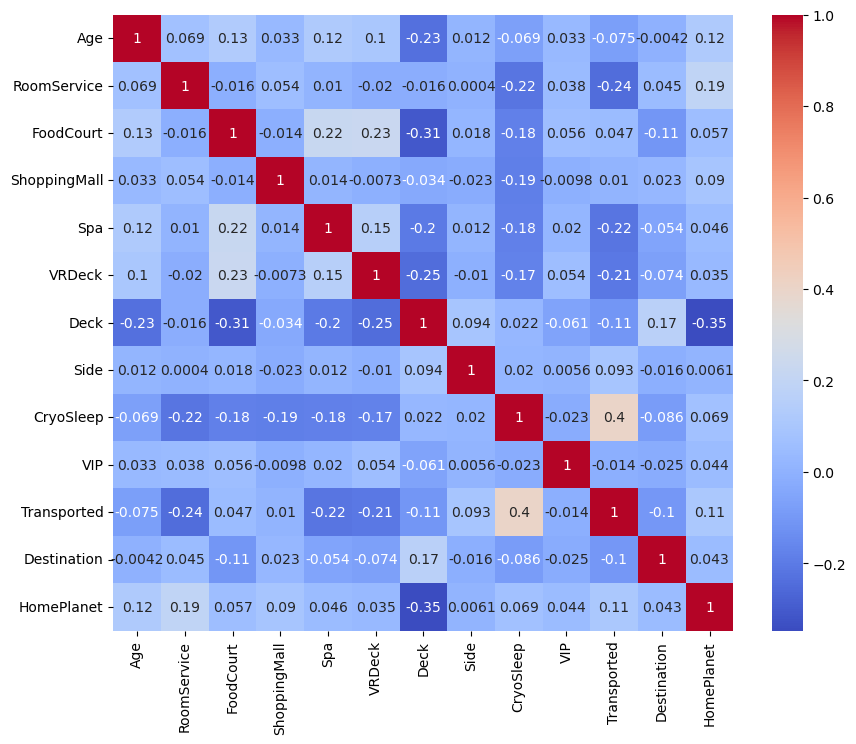

In [8]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", annot=True)

Great!! the final features we have created from the data show a high level of uncorrelation which indicates that each of our feature can contribute without causing an issue of multicollinearity!
let's see if we need to scale our data now

In [9]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side,CryoSleep,VIP,Transported,Destination,HomePlanet
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,4.389969,0.539054,0.399287,0.069596,0.503624,1.515242,0.719199
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,1.842573,0.542487,0.538345,0.333871,0.500016,0.840148,0.863402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,6.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,8.000000,2.000000,2.000000,2.000000,1.000000,3.000000,3.000000


There seems to be a significant level of disparity between our features so we will proceed to scaling the data

In [10]:
# Let's Scale the data !!!
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Convert the scaled data back to a dataframe
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

# Check the distribution of the scaled features
print(df_scaled.describe())
df.isna().sum()


                Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8.514000e+03  8.512000e+03  8.510000e+03  8.485000e+03  8.510000e+03   
mean   6.217458e-17 -1.419082e-17 -1.669901e-17  5.443168e-18  2.087376e-17   
std    1.000059e+00  1.000059e+00  1.000059e+00  1.000059e+00  1.000059e+00   
min   -1.989756e+00 -3.370254e-01 -2.842738e-01 -2.873167e-01 -2.737359e-01   
25%   -6.783417e-01 -3.370254e-01 -2.842738e-01 -2.873167e-01 -2.737359e-01   
50%   -1.261671e-01 -3.370254e-01 -2.842738e-01 -2.873167e-01 -2.737359e-01   
75%    6.330730e-01 -2.665267e-01 -2.371097e-01 -2.426636e-01 -2.218284e-01   
max    3.462968e+00  2.115309e+01  1.821709e+01  3.856422e+01  1.944053e+01   

            VRDeck    DeckNumber          Deck          Side     CryoSleep  \
count  8505.000000  8.494000e+03  8.693000e+03  8.693000e+03  8.693000e+03   
mean      0.000000  7.026794e-17  1.062585e-16 -5.312927e-17 -4.270776e-17   
std       1.000059  1.000059e+00  1.000058e+00  1.0000

Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
DeckNumber      199
Deck              0
Side              0
CryoSleep         0
VIP               0
Transported       0
Group             0
GroupNumber       0
Destination       0
HomePlanet        0
dtype: int64

    Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck DeckNumber  \
0  39.0          0.0        0.0           0.0     0.0     0.0          0   
1  24.0        109.0        9.0          25.0   549.0    44.0          0   
2  58.0         43.0     3576.0           0.0  6715.0    49.0          0   
3  33.0          0.0     1283.0         371.0  3329.0   193.0          0   
4  16.0        303.0       70.0         151.0   565.0     2.0          1   

   Deck  Side  CryoSleep  VIP  Transported Group GroupNumber  Destination  \
0     1     0          0    0            0  0001          01            2   
1     5     1          0    0            1  0002          01            2   
2     0     1          0    1            0  0003          01            2   
3     0     1          0    0            0  0003          02            2   
4     5     1          0    0            1  0004          01            2   

   HomePlanet  
0           1  
1           0  
2           1  
3           1  


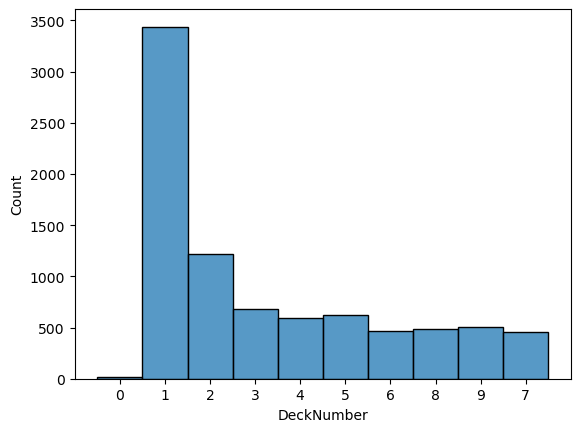

In [11]:
print (df.head())
sns.histplot(df['DeckNumber'].dropna(), bins=50)
plt.show()

Okay so now it's finally time to fix the NAN values that we have avoided so far. There are many approaches we can use to handle this. We can outright remove rows that contain NAN values ar we could replace the NAN values with mean/mode that we can extract from the data, this is to my knowledge subjective so I will be tuning this now
# Age
For age and decknumber we will be repalcing the NAN values with the median of the age.
# RoomService,FoodCourt, ShoppingMall, Spa and VRDeck
Since the data contains continuous variables i believe its best to use the mean to replace the NAN values here
# DeckNumber
will drop the nan values

In [12]:
#Replacing NAN with median for age 
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)
#Replacing NAN with mean for RoomService,FoodCourt, ShoppingMall, Spa and VRDeck
mean_RoomService = df['RoomService'].mean()
df['RoomService'].fillna(mean_RoomService, inplace=True)
mean_FoodCourt = df['FoodCourt'].mean()
df['FoodCourt'].fillna(mean_FoodCourt, inplace=True)
mean_ShoppingMall = df['ShoppingMall'].mean()
df['ShoppingMall'].fillna(mean_ShoppingMall, inplace=True)
mean_Spa = df['Spa'].mean()
df['Spa'].fillna(mean_Spa, inplace=True)
mean_VRDeck = df['VRDeck'].mean()
df['VRDeck'].fillna(mean_VRDeck, inplace=True)
#Dropping NAN DeckNumber
df.dropna(subset=['Age'], inplace=True)
df.dropna(subset=['DeckNumber'], inplace=True)
df.isna().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
DeckNumber      0
Deck            0
Side            0
CryoSleep       0
VIP             0
Transported     0
Group           0
GroupNumber     0
Destination     0
HomePlanet      0
dtype: int64

We have finally dropped the NAN values, let's move on to training and testing our models.
# I- Logistic Regression
The first model we will train and test is the logistic regression model as its a very good classifier especially considering our outcome is binary. It seems like the perfect fit but we will have to test it out to see if that's true.


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
df_LR = df.copy()
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_LR.drop('Transported', axis=1), df_LR['Transported'], test_size=0.2,random_state=42)
# Create a logistic regression object
logreg = LogisticRegression(solver='saga', max_iter=10000, C=0.001, penalty='l1')
# Fit the model on the training data
logreg.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = logreg.predict(X_test)
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7781047675103002


An initial runthrough of the logistic regression model provides us with an accuarcy of 0.773. This is a decent starting point but I believe we can get much more from logistic regression so let's move on to changing the hyperparameters in order to maximize the accuarcy.
We will use GridSearchCV which automatically tests the model using different hyperparameters and selects the best ones.

Running the following code nets us an accuarcy of  0.7737  and the Best hyperparameters:  {'C': 0.001, 'penalty': 'l1'}
![GridSearchCode](https://i.imgur.com/m8kSTkt.png)

I have decided to include this code in the  markdown section because it takes to long and i will just re run the regression using the parameters extracted in the cell above

so our first model leaves us with a meagre 0.7737 accuarcy.
Moving on to the next..

# II-KNN
We will run a k nearest neighbors model on our data, we will use the same training and test set for a fair comparison between the models. First we will run a default knn without messing with any of the parameters and test its accuarcy

In [14]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN object with k=5
knn = KNeighborsClassifier(n_neighbors=26)

# Train the KNN model on the training data
knn.fit(X_train, y_train)

# Use the trained model to predict on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7804590935844614


A 0.76 accuarcy , worse than the previous model. But earlier we were using perfect hyperparameters so it's a bit unfair to judge KNN just yet..

Let's improve our KNN algorithm and pick the best parameters and see our accuarcy score. First we will try Bagging : 

In [15]:
from sklearn import metrics

# calculating the accuracy of models with different values of k
mean_acc = np.zeros(30)
for i in range(1,30):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc
k = 21, 0.783402


Let's graph these results to see our optimal K values

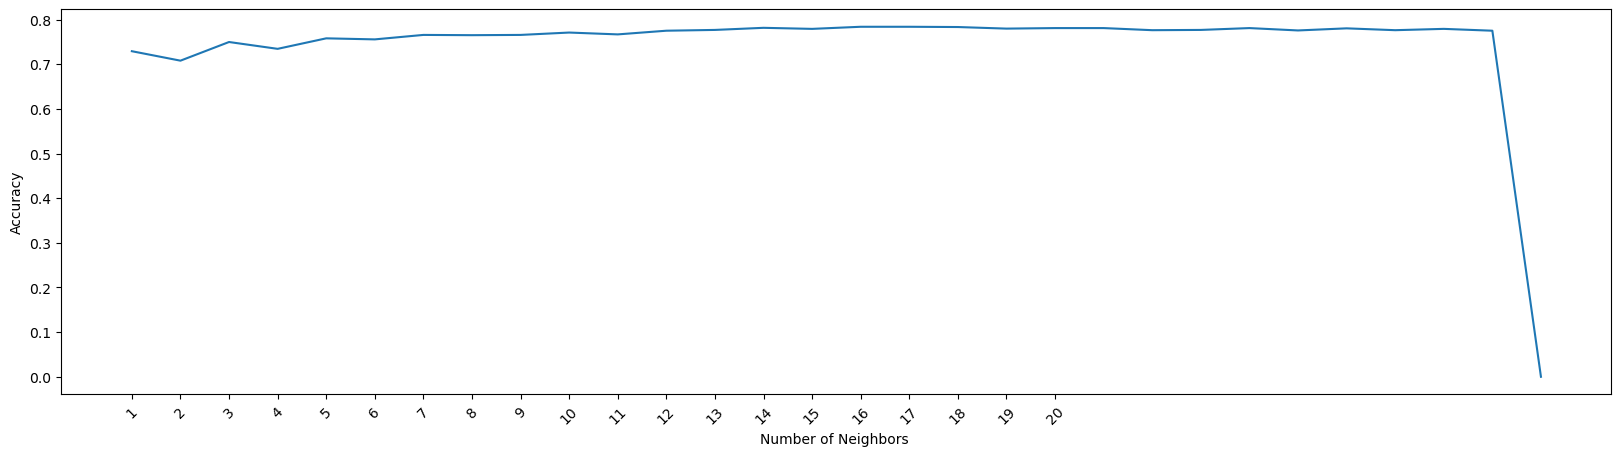

In [16]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (20, 5))
plt.plot(range(1,31), mean_acc)
plt.xticks(loc,rotation=45)

plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

K = 26 gives us an accuarcy 0.7834020011771631, a great start.. let's set the remaining parameters.We will use exhaustive grid search to optimize the hyperparameters

In [17]:
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : [20,22,25,26,28,30],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
# fit the model on our train set
g_res = gs.fit(X_train, y_train)
# find the best score
g_res.best_score_
# get the hyperparameters with the best score
g_res.best_params_
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Accuracy: 0.7804590935844614


In [18]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 26, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  0.7845474613686534
Test set accuracy:  0.7804590935844614


 So our final KNN accuarcy is 0.78340, and iprovement from our 0.7737 in Logistic Regression
 # III- Decision Trees : 
 

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the decision tree classifier
dt = DecisionTreeClassifier()

# Define the hyperparameters to tune
params = {
    'max_depth': np.arange(14, 23),
    'min_samples_split': np.arange(17, 26),
    'min_samples_leaf': np.arange(1, 12)
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(dt, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Accuracy score: ", grid_search.best_score_)
#Best hyperparameters:  {'max_depth': 16, 'min_samples_leaf': 8, 'min_samples_split': 23} Accuracy score:  0.774981604120677

Best hyperparameters:  {'max_depth': 14, 'min_samples_leaf': 9, 'min_samples_split': 21}
Accuracy score:  0.7711552612214865


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
# Step 6: Optimize the model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7804590935844614
Confusion Matrix:
 [[603 250]
 [123 723]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.76       853
           1       0.74      0.85      0.79       846

    accuracy                           0.78      1699
   macro avg       0.79      0.78      0.78      1699
weighted avg       0.79      0.78      0.78      1699

